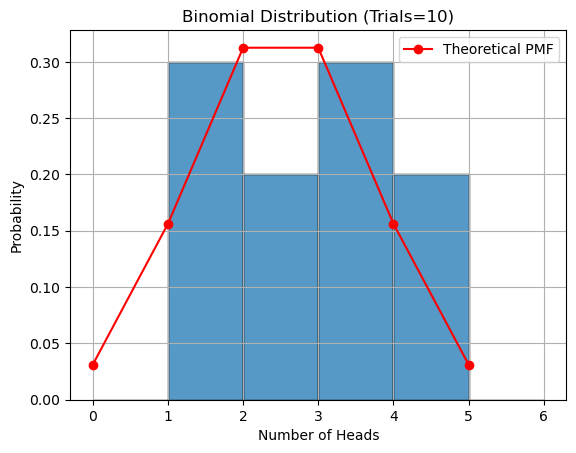

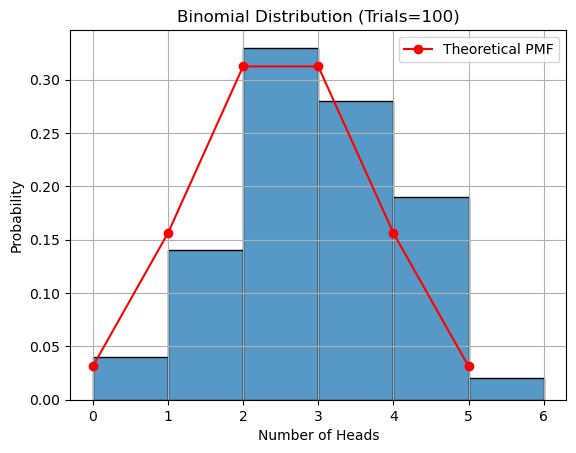

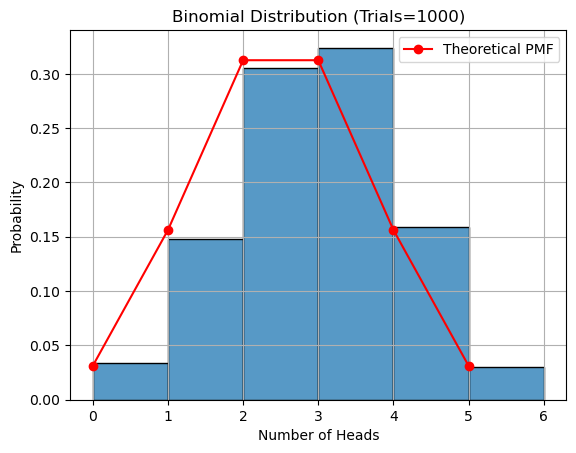

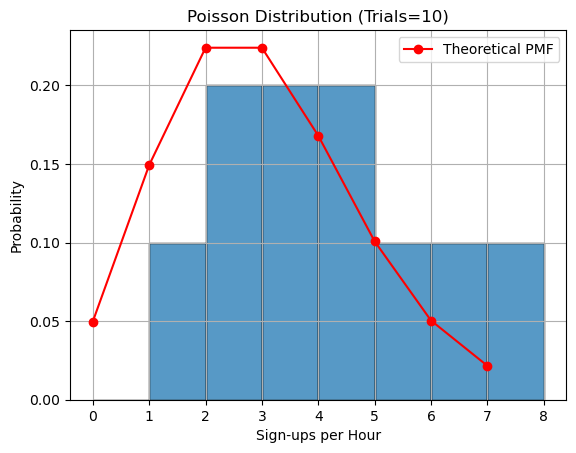

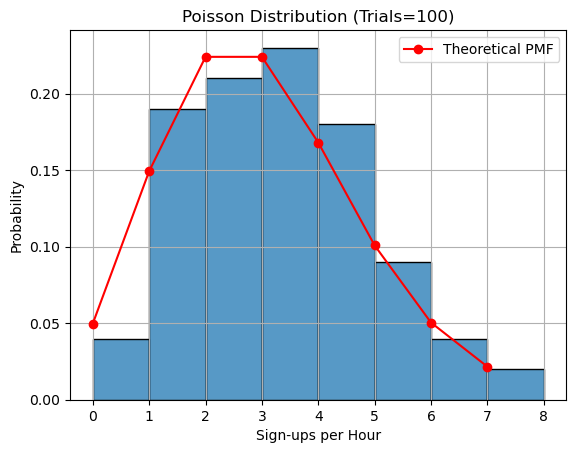

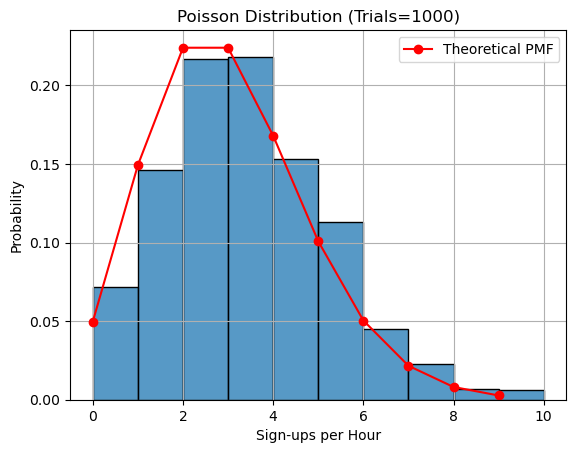

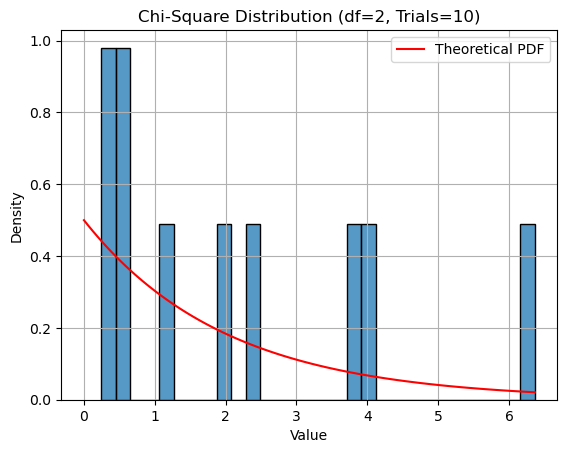

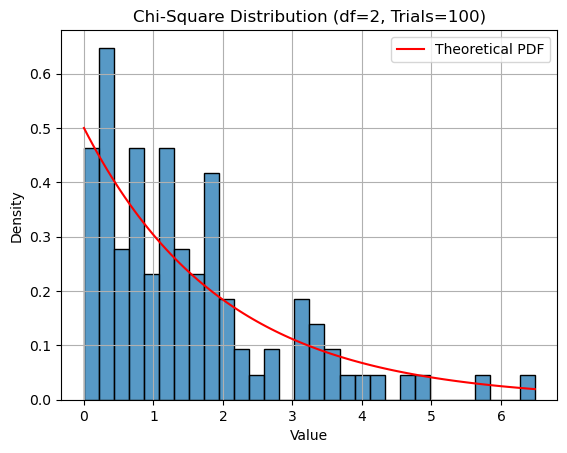

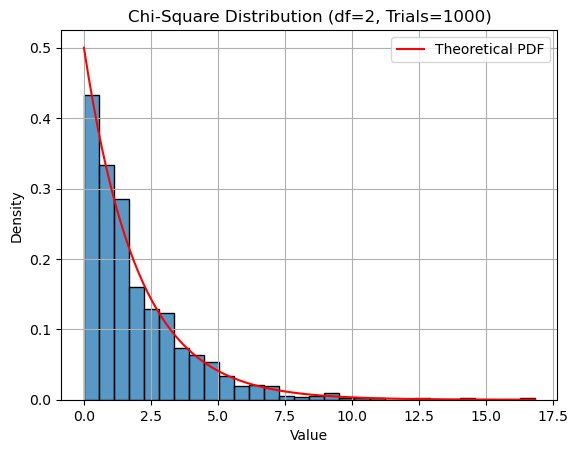

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, poisson, chi2

# Binomial Distribution
def simulate_binomial(n=5, p=0.5, trials_list=[10, 100, 1000]):
    for trials in trials_list:
        data = np.random.binomial(n=n, p=p, size=trials)
        plt.figure()
        sns.histplot(data, bins=range(n+2), kde=False, stat='probability')
        x = np.arange(n+1)
        plt.plot(x, binom.pmf(x, n, p), 'ro-', label='Theoretical PMF')
        plt.title(f'Binomial Distribution (Trials={trials})')
        plt.xlabel('Number of Heads')
        plt.ylabel('Probability')
        plt.legend()
        plt.grid(True)
        plt.show()

# Poisson Distribution
def simulate_poisson(lam=3, trials_list=[10, 100, 1000]):
    for trials in trials_list:
        data = np.random.poisson(lam=lam, size=trials)
        plt.figure()
        sns.histplot(data, bins=range(max(data)+2), kde=False, stat='probability')
        x = np.arange(0, max(data)+1)
        plt.plot(x, poisson.pmf(x, lam), 'ro-', label='Theoretical PMF')
        plt.title(f'Poisson Distribution (Trials={trials})')
        plt.xlabel('Sign-ups per Hour')
        plt.ylabel('Probability')
        plt.legend()
        plt.grid(True)
        plt.show()

# Chi-Square Distribution
def simulate_chisquare(df=2, trials_list=[10, 100, 1000]):
    for trials in trials_list:
        data = np.random.chisquare(df=df, size=trials)
        plt.figure()
        sns.histplot(data, bins=30, kde=False, stat='density')
        x = np.linspace(0, max(data), 100)
        plt.plot(x, chi2.pdf(x, df), 'r-', label='Theoretical PDF')
        plt.title(f'Chi-Square Distribution (df={df}, Trials={trials})')
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)
        plt.show()

# Run simulations
simulate_binomial()
simulate_poisson()
simulate_chisquare()


In [5]:
import pandas as pd
from scipy.stats import ttest_1samp, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings("ignore")  # Suppress minor warnings for cleaner output

# Load data
df = pd.read_csv(r"C:\Users\Sathya\Downloads\Hero Vired\Statistics Assignment\car_sales_cleaned\car_sales_cleaned.csv")

# ---------------------------------------------
# 1. One-Sample t-Test: Is Toyota resale price ~ ₹12,400?
# ---------------------------------------------
toyota_prices = df[df['make'] == 'Toyota']['sellingprice']
t_stat, p_val = ttest_1samp(toyota_prices, 12400)

print("\n--- One-Sample t-Test (Toyota ~ ₹12,400) ---")
print(f"T-Statistic = {t_stat:.4f}, p-value = {p_val:.4f}")
if p_val < 0.05:
    print("Reject the null hypothesis: Toyota resale price is significantly different from ₹12,400.")
else:
    print(" Fail to reject the null hypothesis: No significant difference from ₹12,400.")

# ---------------------------------------------
# 2. Two-Way ANOVA: Resale price ~ Body Type + Transmission (only black cars)
# ---------------------------------------------
black_cars = df[df['color'].str.lower() == 'black']

# Filter valid combinations (at least 10 cars per combination)
valid_black_cars = black_cars.groupby(['body', 'transmission']).filter(lambda x: len(x) >= 10)

# Optional: simplify rare body types into 'Other' if needed
body_counts = valid_black_cars['body'].value_counts()
common_bodies = body_counts[body_counts > 100].index
valid_black_cars['body'] = valid_black_cars['body'].apply(lambda x: x if x in common_bodies else 'Other')

# Run Two-Way ANOVA
model = ols('sellingprice ~ C(body) + C(transmission) + C(body):C(transmission)', data=valid_black_cars).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\n--- Two-Way ANOVA (Black Cars: Body & Transmission) ---")
print(anova_table)

# ---------------------------------------------
# 3. Chi-Square Test: Color distribution (Toyota vs All Brands)
# ---------------------------------------------
color_dist_all = df['color'].value_counts()
color_dist_toyota = df[df['make'] == 'Toyota']['color'].value_counts()

# Build contingency table
color_df = pd.DataFrame({'All': color_dist_all, 'Toyota': color_dist_toyota}).fillna(0).astype(int)
chi2_stat, p_val, dof, expected = chi2_contingency(color_df.T)

print("\n--- Chi-Square Test (Color Distribution: Toyota vs All) ---")
print(f"Chi2 Statistic = {chi2_stat:.4f}, p-value = {p_val:.4f}")
if p_val < 0.05:
    print("Reject the null hypothesis: Toyota color distribution is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in color distribution.")



--- One-Sample t-Test (Toyota ~ ₹12,400) ---
T-Statistic = -1.0728, p-value = 0.2833
 Fail to reject the null hypothesis: No significant difference from ₹12,400.

--- Two-Way ANOVA (Black Cars: Body & Transmission) ---
                               sum_sq        df           F        PR(>F)
C(body)                  1.310813e+12      29.0  437.895905  0.000000e+00
C(transmission)          4.446327e+10       2.0  215.377163  4.486798e-94
C(body):C(transmission)  4.917782e+10      58.0    8.214281  6.579744e-57
Residual                 1.097001e+13  106276.0         NaN           NaN

--- Chi-Square Test (Color Distribution: Toyota vs All) ---
Chi2 Statistic = 3064.8001, p-value = 0.0000
Reject the null hypothesis: Toyota color distribution is significantly different.
